# Credit card fraud detection

### Exploring the credit card transaction data to learn a model for anomalies. 
### Key concept: handling skewed data.

#### Author: Sushant N. More

#### Revision history: 

October 20, 2017: Started writing

Borrows elements from the [this notebook](https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now/notebook) on Kaggle

See the description for data [here](https://www.kaggle.com/dalpozz/creditcardfraud)


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

Importing the data

In [2]:
df = pd.read_csv('./creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


As described here V1 through V28 are the obtained through PCA.
The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.



Data exploration is in the order

In [19]:
df['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
5              2.0
6              4.0
7              7.0
8              7.0
9              9.0
10            10.0
11            10.0
12            10.0
13            11.0
14            12.0
15            12.0
16            12.0
17            13.0
18            14.0
19            15.0
20            16.0
21            17.0
22            18.0
23            18.0
24            22.0
25            22.0
26            23.0
27            23.0
28            23.0
29            23.0
            ...   
284777    172764.0
284778    172764.0
284779    172766.0
284780    172766.0
284781    172766.0
284782    172767.0
284783    172768.0
284784    172768.0
284785    172768.0
284786    172768.0
284787    172769.0
284788    172770.0
284789    172770.0
284790    172771.0
284791    172774.0
284792    172774.0
284793    172775.0
284794    172777.0
284795    172778.0
284796    172780.0
284797    172782.0
284798    17

So, time just monotonically increases

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

We find that no NULL values are present.

Just taking a look at the purchase amount to get a feel for values

In [11]:
df.loc[:,'Amount']

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
5           3.67
6           4.99
7          40.80
8          93.20
9           3.68
10          7.80
11          9.99
12        121.50
13         27.50
14         58.80
15         15.99
16         12.99
17          0.89
18         46.80
19          5.00
20        231.71
21         34.09
22          2.28
23         22.75
24          0.89
25         26.43
26         41.88
27         16.00
28         33.00
29         12.99
           ...  
284777      1.00
284778     80.00
284779     25.00
284780     30.00
284781     13.00
284782     12.82
284783     11.46
284784     40.00
284785      1.79
284786      8.95
284787      9.99
284788      3.99
284789     60.50
284790      9.81
284791     20.32
284792      3.99
284793      4.99
284794      0.89
284795      9.87
284796     60.00
284797      5.49
284798     24.05
284799     79.99
284800      2.68
284801      2.69
284802      0.77
284803     24.79
284804     67.

In [20]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

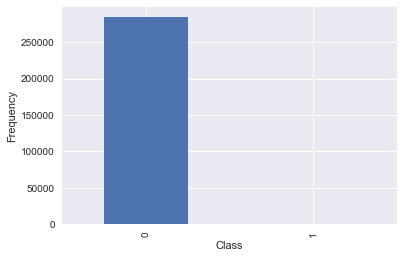

In [25]:
df['Class'].value_counts().plot(kind = 'bar')
plt.xlabel('Class')
plt.ylabel('Frequency')

** Highly skewed **

There are two things to keep in mind when dealing with skewed data

1. Accuracy is no longer a good metric.  (A model which predicts y = 0, will be highly accurate too!). So, we need to change the accuracy metric to some thing like F1 score

2. Try to restore the balance by resampling.  This has two components. 

(i) Oversampling: add copies of the under-represented class (works better when dataset small)

(ii) Undersampling: Delete instances from the over-represented class (works better when dataset large)

Another popular approach goes by the name SMOTE---Synthetic minority oversampling technique. In SMOTE the oversampling approach is not by replicating minority class but constructing new minority class data instance via an algorithm.

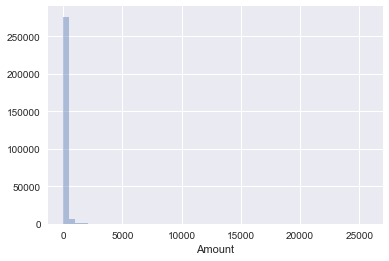

In [30]:
sns.distplot(df['Amount'], kde = False)

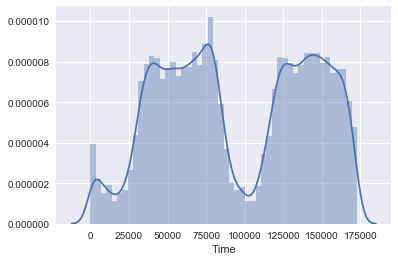

In [29]:
sns.distplot(df['Time'])

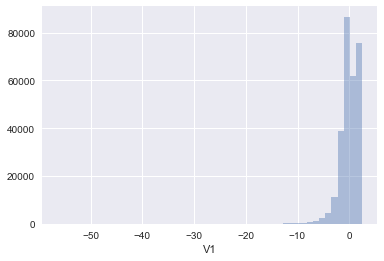

In [39]:
sns.distplot(df['V1'], kde = False)

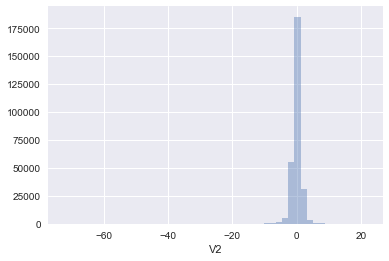

In [40]:
sns.distplot(df['V2'], kde = False)

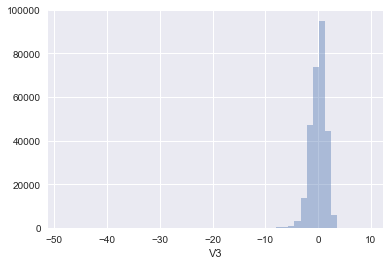

In [41]:
sns.distplot(df['V3'], kde = False)

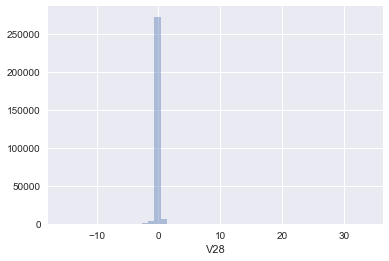

In [42]:
sns.distplot(df['V28'], kde = False)

Interesting to note that the features V1 through V28 are mostly centered around zero. 

In [44]:
df['V11'].describe()

count    2.848070e+05
mean     9.170318e-16
std      1.020713e+00
min     -4.797473e+00
25%     -7.624942e-01
50%     -3.275735e-02
75%      7.395934e-01
max      1.201891e+01
Name: V11, dtype: float64

Normalize the Time and the Amount feature to fall in line with the V's. 

In [49]:
df['Amount'].values.reshape(-1, 1)

array([[ 149.62],
       [   2.69],
       [ 378.66],
       ..., 
       [  67.88],
       [  10.  ],
       [ 217.  ]])

In [50]:
np.shape(df['Amount'].values.reshape(-1, 1))

(284807, 1)

Use reshape to get the amount column in the row form. The -1 entry tells numpy to figure out the length of that dimension. 

In [53]:
from sklearn.preprocessing import StandardScaler

df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['normTime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

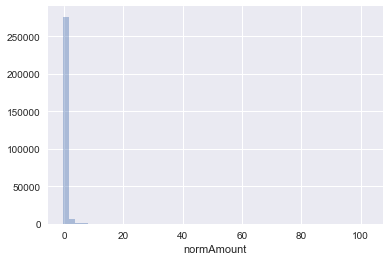

In [52]:
sns.distplot(df['normAmount'], kde = False)

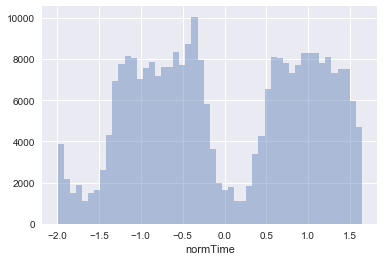

In [54]:
sns.distplot(df['normTime'], kde = False)